In [ ]:
!pip install requests;

!pip install beautifulsoup4;

!pip install scrapy;

!pip install natasha;

!pip install pytagcloud;

!pip install pygame;

!pip install simplejson;

In [127]:
import re;
from urllib.request import urlopen;
from bs4 import BeautifulSoup;
from natasha import (Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc);
import collections;

habrHtml = urlopen('https://habr.com/ru/search/?q=nft&target_type=posts&order=relevance');
habrHtmlBeautifulSoaped = BeautifulSoup(habrHtml, "html.parser");

relevantNftTopics = habrHtmlBeautifulSoaped.findAll('h2', {'class' : 'tm-article-snippet__title tm-article-snippet__title_h2'});
relevantNftTopicsAuthors = habrHtmlBeautifulSoaped.findAll('span', {'class' : 'tm-user-info__user'});
relevantNftTopicsTime = habrHtmlBeautifulSoaped.findAll('time');
relevantNftTopicsWatches = habrHtmlBeautifulSoaped.findAll('span', {'class' : 'tm-icon-counter__value'});
relevantNftTopicsRating = habrHtmlBeautifulSoaped.findAll('span', {'class' : 'tm-votes-meter__value'});

topicsCount = len(relevantNftTopicsAuthors);
topics = "";

for relevantNftTopic in relevantNftTopics:
  topics += relevantNftTopic.get_text();
  topics += ". "

segmenter = Segmenter();
morphVocab = MorphVocab();

newsEmbedding = NewsEmbedding();
morphTagger = NewsMorphTagger(newsEmbedding);
syntaxParser = NewsSyntaxParser(newsEmbedding);
nerTagger = NewsNERTagger(newsEmbedding);

namesExtractor = NamesExtractor(morphVocab);

doc = Doc(topics);

for author in relevantNftTopicsAuthors:
  print(author.get_text().replace('\n', "").replace('      ', ""));

cryptolawyer     
tw_community     
dedstriger     
helloageeva     
host_m     
ru_vds     
artemlinov22     
mdanilchyk     
Ermolaev-Dmitry     
AnnieBronson     
MasterOgon     
BobcatKat     
grokru     
maybe_elf     
BobcatKat     
AnnieBronson     
maybe_elf     
Goodluck     
maybe_elf     
maybe_elf     


In [128]:
doc.segment(segmenter);
doc.tag_morph(morph_tagger);

for token in doc.tokens:
  token.lemmatize(morph_vocab);

lemma_counter = collections.Counter();
lemma_string = "";

for token in doc.tokens:
  lemma_counter[token.lemma] += 1;
  lemma_string += token.lemma;
  lemma_string += " ";

print(doc.tokens);

[DocToken(stop=3, text='Что', pos='PRON', feats=<Inan,Nom,Neut,Sing>, lemma='что'), DocToken(start=4, stop=9, text='такое', pos='DET', feats=<Nom,Neut,Sing>, lemma='такой'), DocToken(start=10, stop=13, text='NFT', pos='PROPN', feats=<Yes>, lemma='nft'), DocToken(start=14, stop=16, text='на', pos='ADP', lemma='на'), DocToken(start=17, stop=22, text='самом', pos='ADJ', feats=<Loc,Pos,Neut,Sing>, lemma='сам'), DocToken(start=23, stop=27, text='деле', pos='NOUN', feats=<Inan,Loc,Neut,Sing>, lemma='дело'), DocToken(start=27, stop=28, text=',', pos='PUNCT', lemma=','), DocToken(start=29, stop=36, text='сколько', pos='NUM', feats=<Inan,Acc>, lemma='сколько'), DocToken(start=37, stop=43, text='обмана', pos='NOUN', feats=<Inan,Gen,Masc,Sing>, lemma='обман'), DocToken(start=44, stop=49, text='может', pos='VERB', feats=<Imp,Ind,Sing,3,Pres,Fin,Act>, lemma='мочь'), DocToken(start=50, stop=58, text='скрывать', pos='VERB', feats=<Imp,Inf,Act>, lemma='скрывать'), DocToken(start=58, stop=59, text=',',

In [129]:
print(lemma_counter.most_common());

[('.', 18), ('nft', 15), ('и', 9), (',', 8), ('в', 8), ('на', 5), (':', 3), ('как', 3), ('с', 3), ('что', 2), ('для', 2), ('?.', 2), ('пирамида', 2), ('платформа', 2), ('продать', 2), ('«', 2), ('»', 2), ('nft-токен', 2), ('$', 2), ('млн', 2), ('такой', 1), ('сам', 1), ('дело', 1), ('сколько', 1), ('обман', 1), ('мочь', 1), ('скрывать', 1), ('какой', 1), ('сфера', 1), ('реально', 1), ('применимый', 1), ('ответ', 1), ('часто', 1), ('задавать', 1), ('вопрос', 1), ('о', 1), ('non-fungible', 1), ('token', 1), ('(', 1), (')', 1), ('основа', 1), ('nft-токены', 1), ('новый', 1), ('валюта', 1), ('спортивный', 1), ('фанат', 1), ('—', 1), ('это', 1), ('человек', 1), ('уже', 1), ('терять', 1), ('она', 1), ('деньга', 1), ('котик', 1), ('революция', 1), ('цифровой', 1), ('мир', 1), ('или', 1), ('хайповый', 1), ('тат', 1), ('салон', 1), ('киев', 1), ('запускать', 1), ('татуировка', 1), ('топ-6', 1), ('где', 1), ('можно', 1), ('купить', 1), ('суть', 1), ('психология', 1), ('их', 1), ('покупка', 1), (

(-0.5, 399.5, 199.5, -0.5)

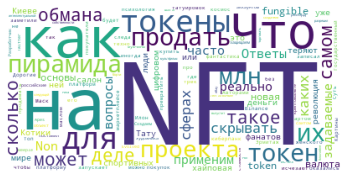

In [130]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud().generate(topics)
cloud.background_color = 'white'
cloud.colormap = "cividis"

plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

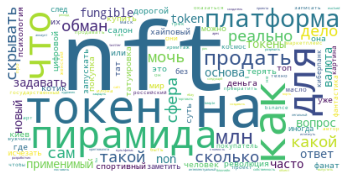

In [131]:
cloud = WordCloud().generate(lemma_string)
cloud.background_color = 'white'
cloud.colormap = "viridus"

plt.imshow(cloud)
plt.axis('off')